In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Adjust display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Expand the width to show all columns
pd.set_option('display.max_rows', None)     # Show all rows (if needed)

In [62]:
# Train Dataset doesnot have headers and the values in the dataset are seprated by space.
df_train = pd.read_csv('/Users/deepesh/Desktop/NewProjects/PMMLProject/notebook/data/train_FD001.txt',sep=' ',header=None)

In [63]:
df_train.shape

(20631, 28)

In [64]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [65]:
# Test Dataset doesnot have headers and the values in the dataset are seprated by space.
df_test = pd.read_csv('/Users/deepesh/Desktop/NewProjects/PMMLProject/notebook/data/test_FD001.txt',sep=' ',header=None)

In [66]:
df_test.shape

(13096, 28)

In [67]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [68]:
## Dropping NAN columns of Train and Test data
df_train.drop(columns=[26,27],inplace=True)
df_test.drop(columns=[26,27],inplace=True)

In [69]:
print(df_train.shape)
print(df_test.shape)

(20631, 26)
(13096, 26)


### Dataset Symbol Description 

HPC_eff_mod:- HPC efficiency modifier

HPC_flow_mod:- HPC Flow modifier

T2:- Total temperature at fan inlet

T24:- Total temperature at LPC outlet °R

T30:- Total temperature at HPC outlet °R 

T50:- Total temperature at LPT outlet °R 

P2:- Pressure at fan inlet psia 

P15:- Total pressure in bypass-duct psia

P30:- Total pressure at HPC outlet

Nf:- Physical fan speed

Nc:- Physical core speed rpm epr Engine pressure ratio (P50/P2)

Ps30:- Static pressure at HPC outlet psia 

phi:- Ratio of fuel flow to Ps30 pps/psi

NRf:- Corrected fan speed rpm

NRc:- Corrected core speed rpm

BPR:- Bypass Ratio 

farB:- Burner fuel-air ratio 

htBleed:- Bleed Enthalpy 

Nf_dmd:- Demanded Fan Speed rpm

PCNfR_dmd:- Demanded Corrected Fan Speed rpm

W31:- HPT coolent bleed lbm/s

W32:- LPT coolent bleed lbm/s


In [70]:
# Header names provided in the documentation pdf file of the dataset.
columns = ['unit_number','time_in_cycles','HPC_eff_mod','HPC_flow_mod','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [71]:
df_train.columns=columns
df_test.columns=columns

In [72]:
df_train.head()

,unit_number,time_in_cycles,HPC_eff_mod,HPC_flow_mod,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [73]:
df_test.head()

,unit_number,time_in_cycles,HPC_eff_mod,HPC_flow_mod,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [74]:
## Checking Missing Values in train dataset
df_train.isna().sum()

unit_number       0
time_in_cycles    0
HPC_eff_mod       0
HPC_flow_mod      0
TRA               0
T2                0
T24               0
T30               0
T50               0
P2                0
P15               0
P30               0
Nf                0
Nc                0
epr               0
Ps30              0
phi               0
NRf               0
NRc               0
BPR               0
farB              0
htBleed           0
Nf_dmd            0
PCNfR_dmd         0
W31               0
W32               0
dtype: int64

In [75]:
## Check data type of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   HPC_eff_mod     20631 non-null  float64
 3   HPC_flow_mod    20631 non-null  float64
 4   TRA             20631 non-null  float64
 5   T2              20631 non-null  float64
 6   T24             20631 non-null  float64
 7   T30             20631 non-null  float64
 8   T50             20631 non-null  float64
 9   P2              20631 non-null  float64
 10  P15             20631 non-null  float64
 11  P30             20631 non-null  float64
 12  Nf              20631 non-null  float64
 13  Nc              20631 non-null  float64
 14  epr             20631 non-null  float64
 15  Ps30            20631 non-null  float64
 16  phi             20631 non-null  float64
 17  NRf             20631 non-null 

In [76]:
## Checking number of unique values in train dataset columns
df_train.nunique()

unit_number        100
time_in_cycles     362
HPC_eff_mod        158
HPC_flow_mod        13
TRA                  1
T2                   1
T24                310
T30               3012
T50               4051
P2                   1
P15                  2
P30                513
Nf                  53
Nc                6403
epr                  1
Ps30               159
phi                427
NRf                 56
NRc               6078
BPR               1918
farB                 1
htBleed             13
Nf_dmd               1
PCNfR_dmd            1
W31                120
W32               4745
dtype: int64

In [77]:
## Checking Statistics of Train Dataset
df_train.describe()

,unit_number,time_in_cycles,HPC_eff_mod,HPC_flow_mod,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


### Insights of Summary Statistics of Train Dataset
* The dataset covers engines numbered from 1 to 100 which is represented by the column unit_number .
* The average life of engine operations is 109 and the maximum is 362 before failure.
* Several columns (TRA, T2, Nf_dmd, PCNfR_dmd, farB,P2) are constant, which means they do not contribute to the variability in the dataset and might not be useful for modeling.
* Other columns show small variations but are relatively stable (e.g., HPC_eff_mod, HPC_flow_mod, T24, T30, T50,P15,P30,Nf,epr,Ps30,phi,Nrf,W31,W32).
* Columns like unit_number,time_in_cycles, Nc, NRc, BPR, htBleed exhibit more significant variability, suggesting they might be more influential for the target variable RUL.
* The target variable for modeling, RUL, needs to be calculated for each unit and cycle for supervised learning.

### Calculation of Remaining Useful Life(RUL) of each engine and cycle.
Steps:-
* Identify the maximum cycle for each unit(engine).
* Calculate RUL as the difference between the maximum cycle and the current cycle.

In [78]:
# Identify the maximum cycle for each unit
max_cycles_train = df_train.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_test = df_test.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_train.columns = ['unit_number', 'max_cycle_train']
max_cycles_test.columns = ['unit_number', 'max_cycle_test']

# Merge the maximum cycle information back to the original DataFrame
df_train = df_train.merge(max_cycles_train, on='unit_number')
df_test = df_test.merge(max_cycles_test, on='unit_number')

# Calculate RUL
df_train['RUL'] = df_train['max_cycle_train'] - df_train['time_in_cycles']
df_test['ERS'] = df_test['max_cycle_test'] - df_test['time_in_cycles']

# Drop the max_cycle column as it is no longer needed
df_train = df_train.drop('max_cycle_train', axis=1)
df_test = df_test.drop('max_cycle_test', axis=1)

# # Save the dataset with RUL
df_train.to_csv('dataset_train_with_RUL.csv', index=False)
df_test.to_csv('dataset_test_with_ERS.csv', index=False)
# Display the first few rows to verify
print(df_train.head())

   unit_number  time_in_cycles  HPC_eff_mod  HPC_flow_mod    TRA      T2  \
0            1               1      -0.0007       -0.0004  100.0  518.67   
1            1               2       0.0019       -0.0003  100.0  518.67   
2            1               3      -0.0043        0.0003  100.0  518.67   
3            1               4       0.0007        0.0000  100.0  518.67   
4            1               5      -0.0019       -0.0002  100.0  518.67   

      T24      T30      T50     P2    P15     P30       Nf       Nc  epr  \
0  641.82  1589.70  1400.60  14.62  21.61  554.36  2388.06  9046.19  1.3   
1  642.15  1591.82  1403.14  14.62  21.61  553.75  2388.04  9044.07  1.3   
2  642.35  1587.99  1404.20  14.62  21.61  554.26  2388.08  9052.94  1.3   
3  642.35  1582.79  1401.87  14.62  21.61  554.45  2388.11  9049.48  1.3   
4  642.37  1582.85  1406.22  14.62  21.61  554.00  2388.06  9055.15  1.3   

    Ps30     phi      NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd  \
0  47.

In [79]:
df_train.shape

(20631, 27)

In [80]:
df_test.shape

(13096, 27)

### Step 1: Visualizing RUL to understand the distribution and trends.


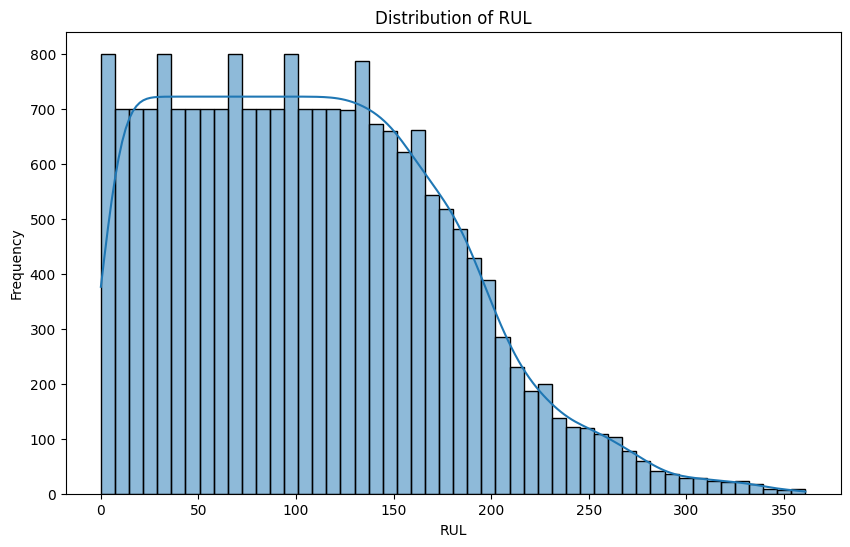

In [81]:
# Distribution of RUL
plt.figure(figsize=(10, 6))
sns.histplot(df_train['RUL'], bins=50, kde=True)
plt.title('Distribution of RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
#plt.savefig('Distribution of RUL',dpi=200)
plt.show()

### Chart Insights
X-Axis (RUL): Represents Remaining Useful Life (RUL) in cycles.
Y-Axis (Frequency): Represents the number of engines with a specific RUL.

Observations:-
1. Uniform Distribution for Lower RUL Values:
   * Between 0 and ~120 cycles, frequency is consistently high.

2. Decreasing Frequency for Higher RUL Values:
   * Beyond ~130 cycles, frequency decreases gradually, then more sharply.
   * Long tail with rare instances of high RUL.

3. Right-Skewed Distribution:
   * More engines have lower RUL values and fewer have higher RUL values.

### Implications for Analysis and Modeling
* Uniform Lower RUL Values: Useful for training models with diverse end-of-life data.
* Decreasing Higher RUL Values: Requires careful validation for higher RUL predictions due to fewer examples.
* Right-Skewed Data: May need normalization or transformation to address skewness for certain machine learning models.

### Step 2: Check for Correlations Between Features and With the Target Variable (RUL)

In [82]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()
correlation_matrix

,unit_number,time_in_cycles,HPC_eff_mod,HPC_flow_mod,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
unit_number,1.000000,0.078753,-0.017895,-0.006197,NaN,NaN,0.014133,0.012621,0.026116,NaN,0.026431,-0.032073,0.039929,-0.052053,NaN,0.024707,-0.031882,0.044230,-0.059473,0.022486,NaN,0.013513,NaN,NaN,-0.020589,-0.016465,0.078753
time_in_cycles,0.078753,1.000000,-0.004527,0.016132,NaN,NaN,0.549898,0.543947,0.624577,NaN,0.105980,-0.595914,0.475977,0.443999,NaN,0.634385,-0.611354,0.477523,0.370324,0.588676,NaN,0.566995,NaN,NaN,-0.583597,-0.585923,-0.736241
HPC_eff_mod,-0.017895,-0.004527,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,-0.001340,-0.009437,-0.000427,-0.004279,NaN,0.011658,-0.001491,0.002318,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559,-0.003198
HPC_flow_mod,-0.006197,0.016132,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,0.014355,-0.016678,0.013285,-0.005425,NaN,0.011690,-0.010923,0.018156,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846,-0.001948
TRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T24,0.014133,0.549898,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,0.132242,-0.702136,0.662325,0.273764,NaN,0.740020,-0.724578,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050,-0.606484
T30,0.012621,0.543947,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,0.116039,-0.664595,0.602481,0.322964,NaN,0.695900,-0.680307,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901,-0.584520
T50,0.026116,0.624577,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,0.150480,-0.793130,0.746852,0.297429,NaN,0.830136,-0.815591,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193,-0.678948
P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


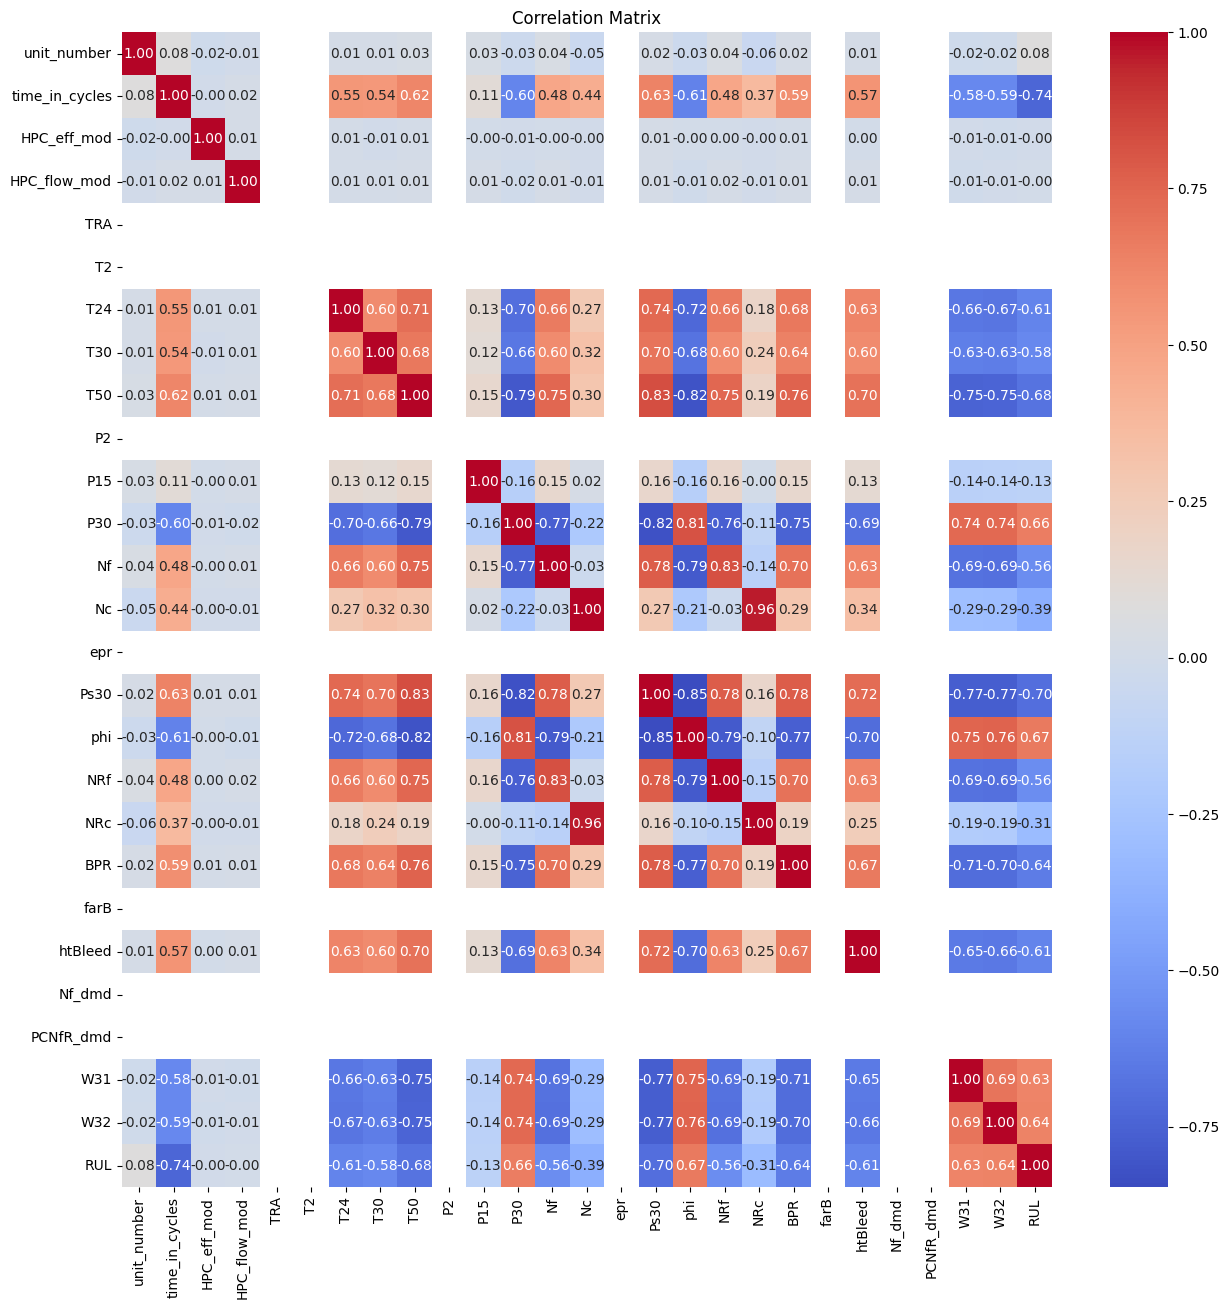

In [83]:
# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.savefig('Correlation Matrix',dpi=200)
plt.show()

### Insights of Correlation Matrix

* Negative Correlation:- time_in_cycles,T24,T30,T50,P30,phi,Nrc,BPr,W31,W32.
  
* Positive Correlation:- unit_number,Ps30,Nrf,htBleed.
  
* Feature Interdependencies:- T24,T30,T50 are highly correlated with eachother ,suggesting they provide same information.P30 and Ps30 ,phi and Ps30, NRF and Nf, Nrc and Nc ,W31 and W32 are also highly correlated .

* Selected Features for Modeling:-
  
  1.time_in_cycles
  
  2.T50 (or T30, T24)
  
  3.P30
  
  4.Ps30
  
  5.Nc (or NRc)
  
  6.NRf (or Nf)
  
  7.phi
  
  8.BPR
  
  9.W32 (or W31)
  
  10.htBleed
  

 ### Step 3: Visualize the Distributions of Key Sensor Measurements and Operational Settings       

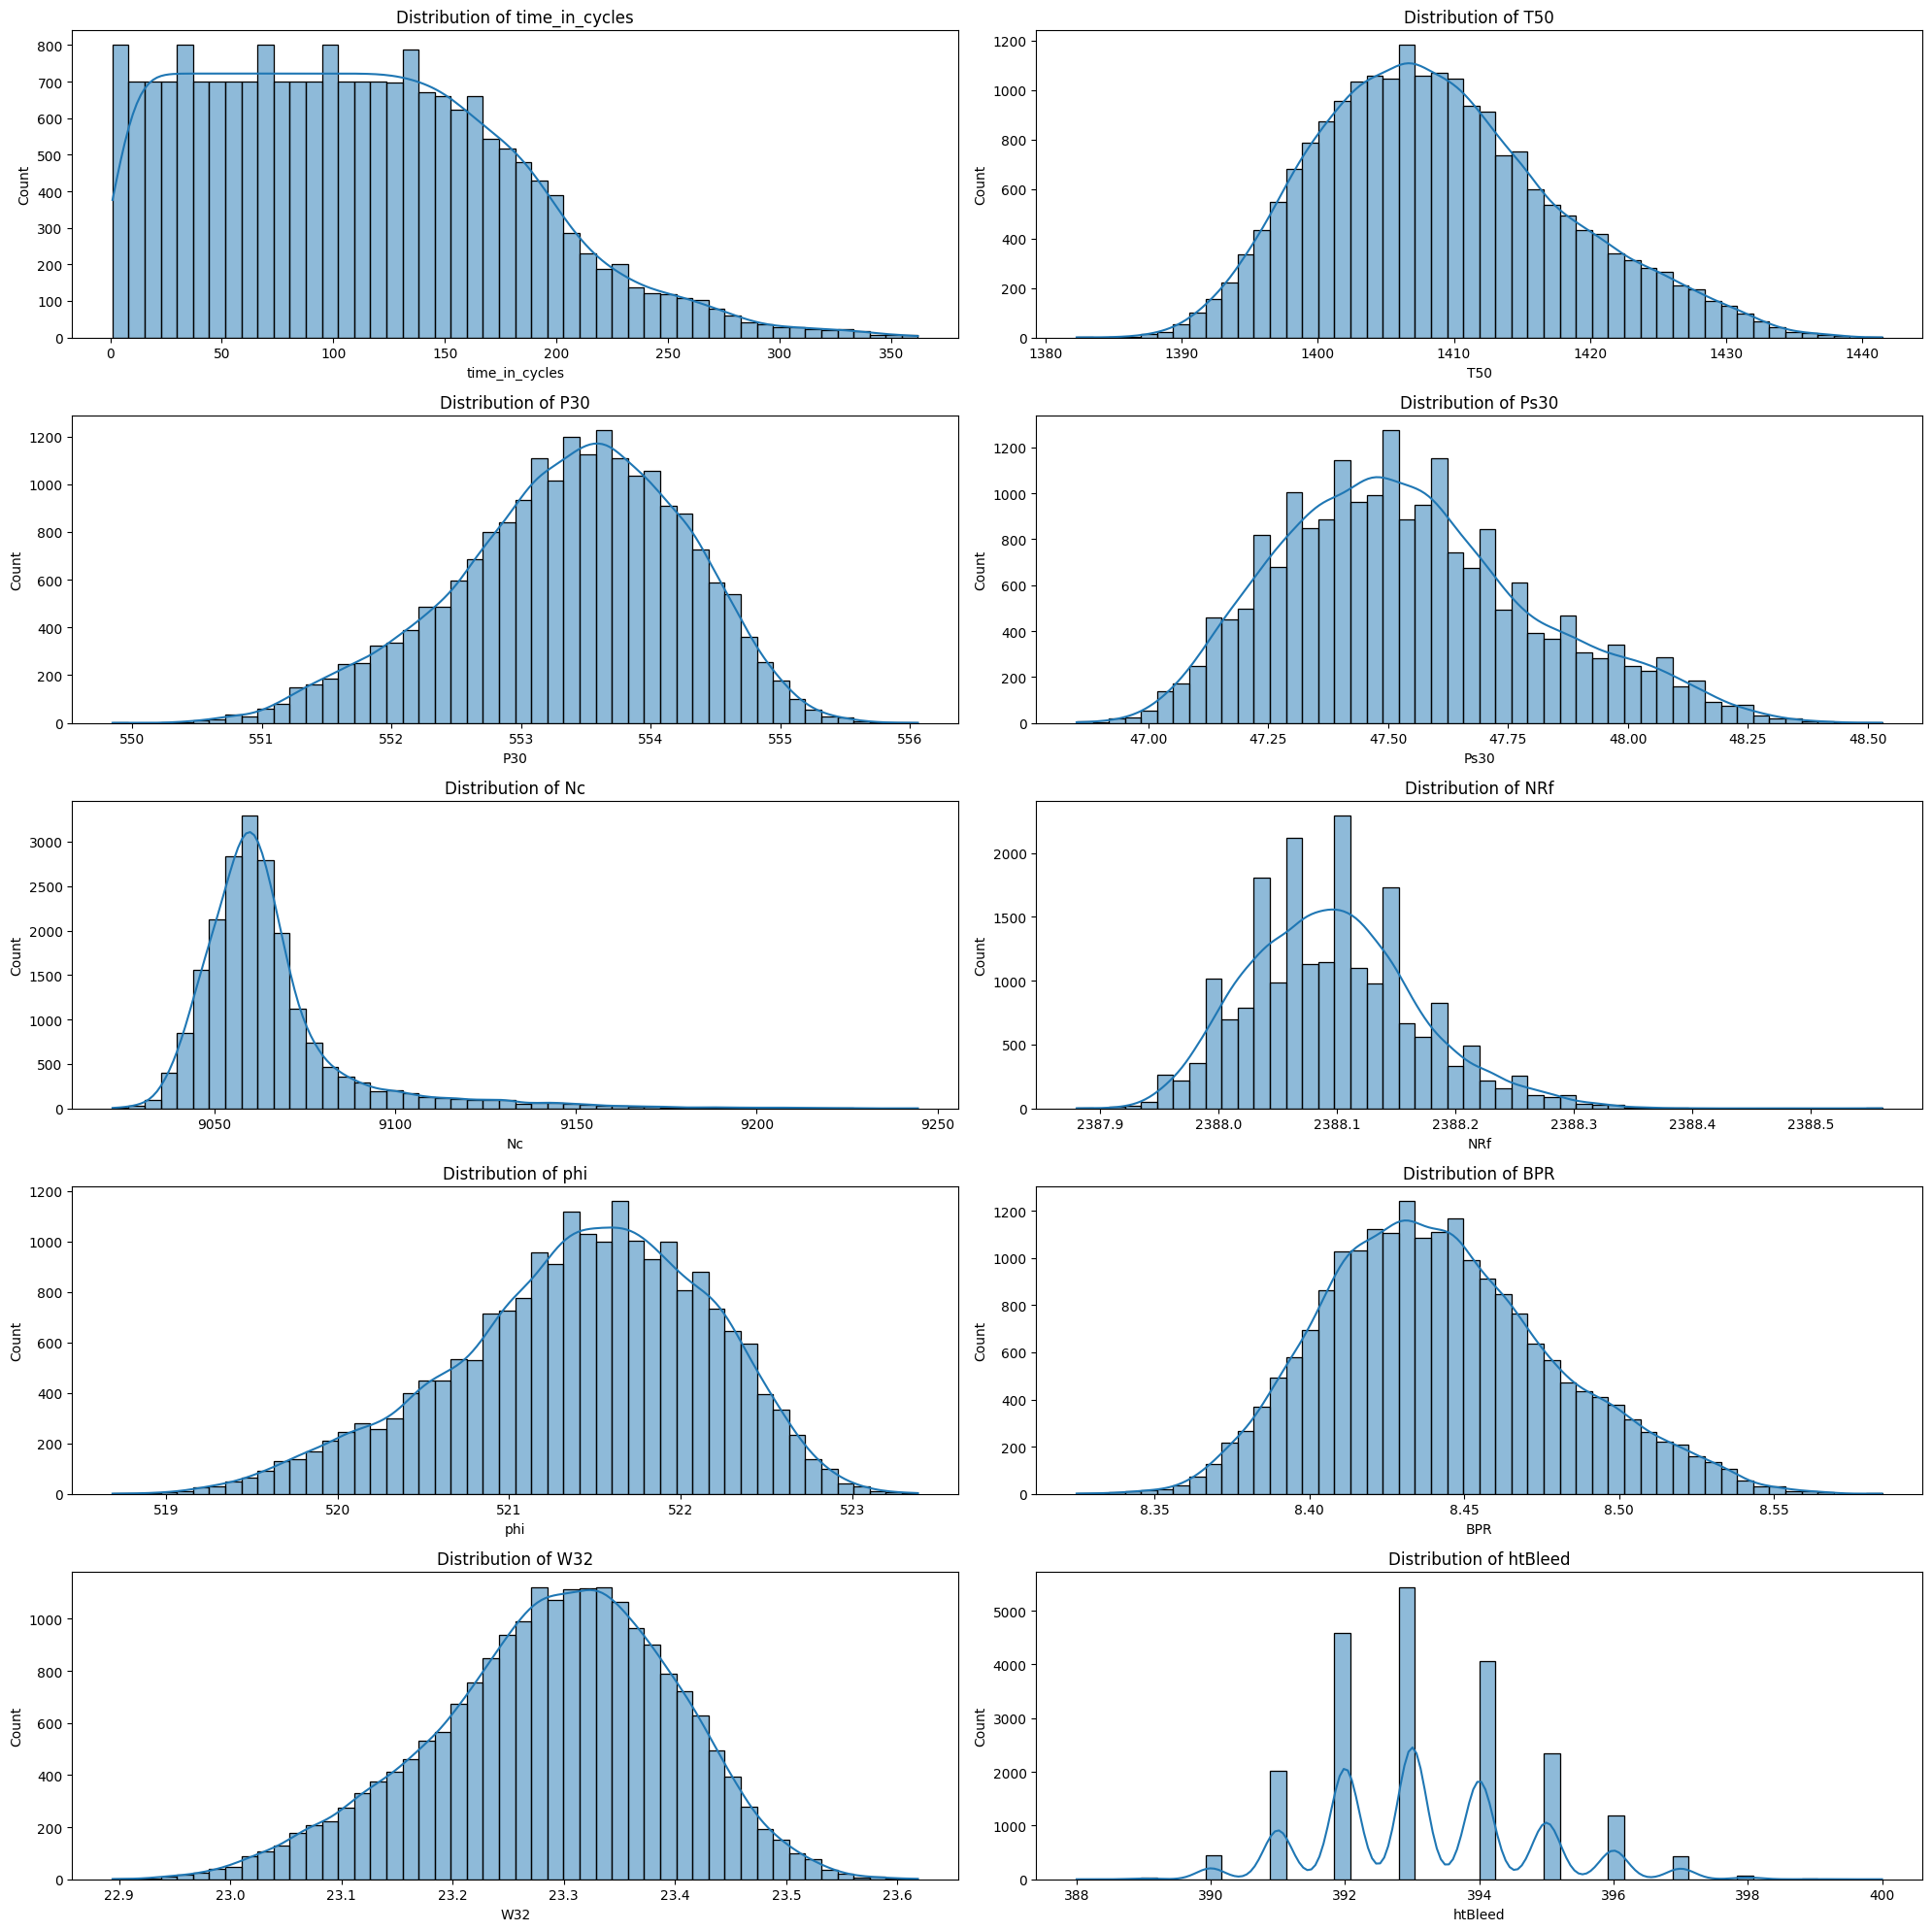

In [84]:
# List of key sensor measurements and operational settings to visualize
key_features = ['time_in_cycles', 'T50', 'P30', 'Ps30', 'Nc', 'NRf', 'phi', 'BPR', 'W32', 'htBleed']

# Plot histograms
plt.figure(figsize=(20, 20))
for i, feature in enumerate(key_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_train[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
#plt.savefig('Distribution of Key Features',dpi=200)
plt.show()    

### Summary of Key Insights

Consistency in Operations: Several features (T50, P30, Ps30, phi, BPR, W32) exhibit approximately normal distributions, indicating consistent operational ranges with variability that could signal engine health changes.

Skewed Distributions: Features like time_in_cycles and Nc are right-skewed, suggesting most engines operate within certain bounds, with fewer engines pushing those boundaries.

Bimodal and Multimodal Features: NRf shows a bimodal distribution, and htBleed shows a multimodal distribution, indicating distinct operating modes or conditions that could be crucial for predicting RUL.

Potential Predictors of RUL: Features with strong distributions and significant variability, such as time_in_cycles, T50, P30, Ps30, Nc, NRf, phi, BPR, W32, and htBleed, are likely to be important predictors of RUL. These should be considered in feature selection and model training.   

### Step 4: Detect Outliers or Anomalies in the Data

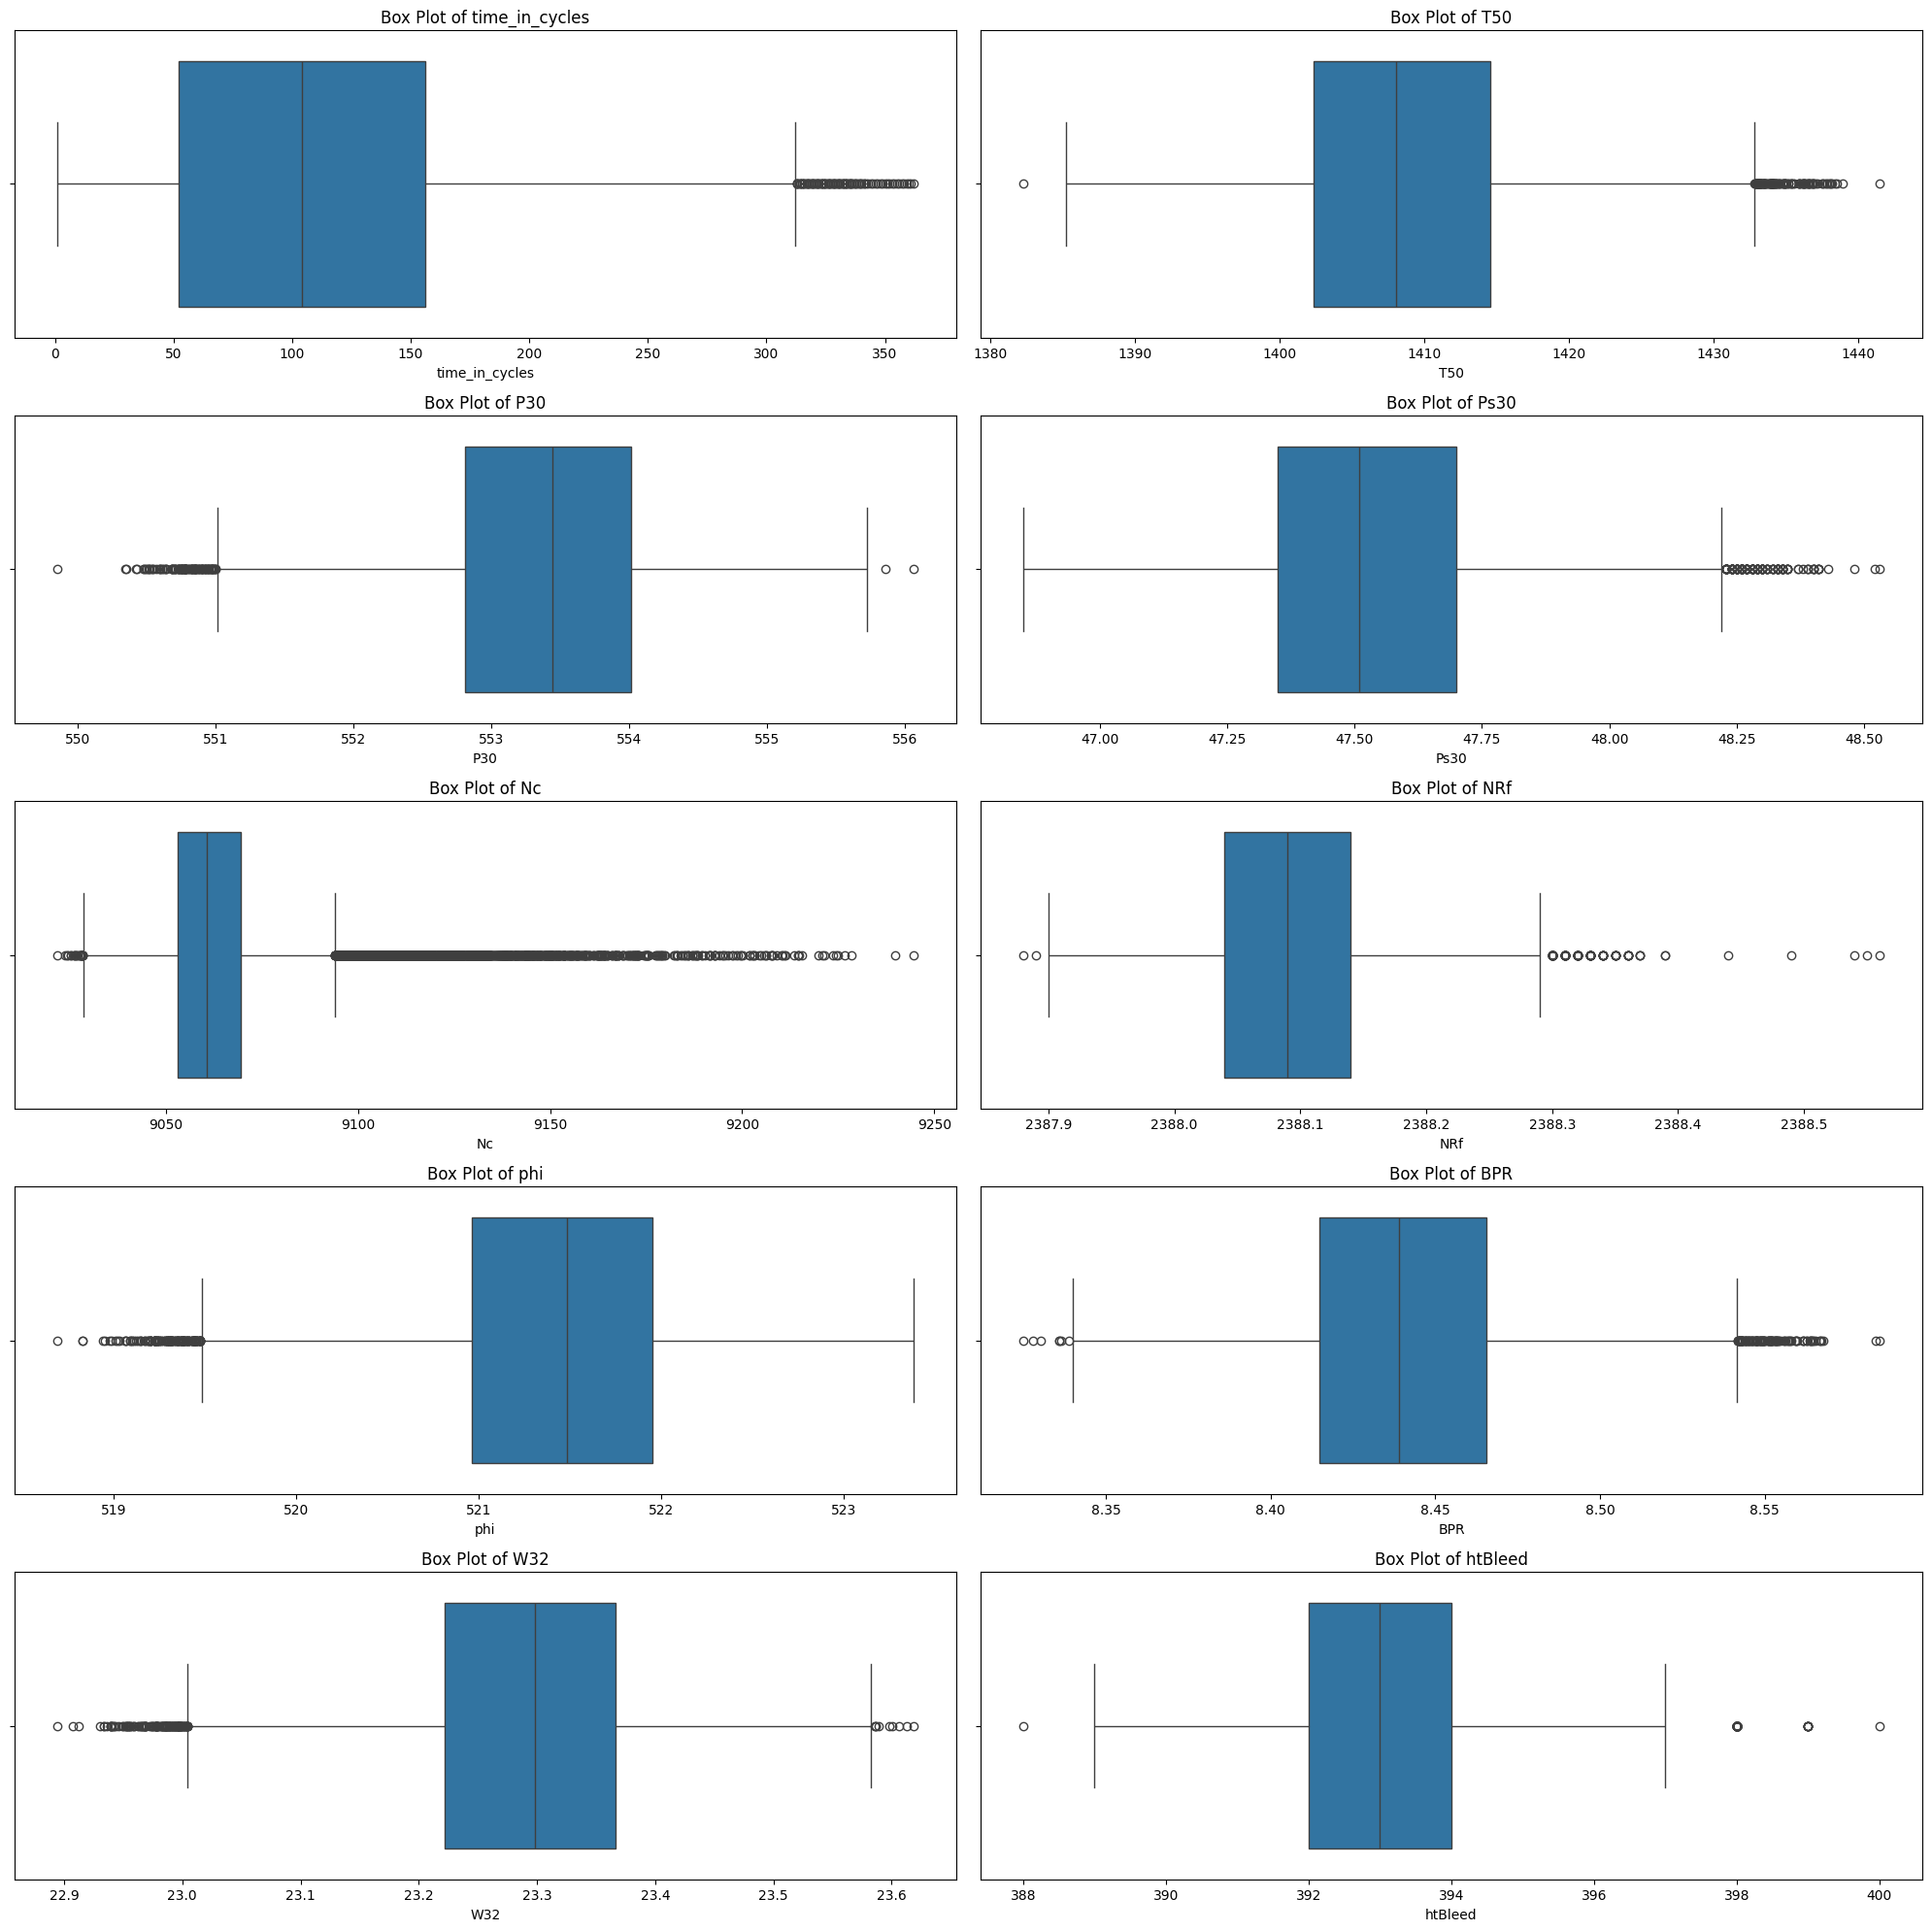

In [85]:
# Plot box plots for key features to detect outliers
plt.figure(figsize=(20, 20))
for i, feature in enumerate(key_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df_train[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
#plt.savefig('Box Plot Features',dpi=200)
plt.show()

### Summary of Key Insights

Outliers: Many features have outliers, indicating that some engines operate under abnormal conditions or that there might be measurement errors. These outliers need to be carefully considered in the modeling process, potentially using techniques like robust scaling or outlier removal.

Skewed Distributions: Features like time_in_cycles and Nc are right-skewed, suggesting that most engines operate within a certain range, with a few extending beyond this range.

Bimodal and Multimodal Distributions: Features like NRf and htBleed show bimodal and multimodal distributions, indicating distinct operating regimes or conditions. This complexity needs to be captured in predictive models.

Consistency: Features such as T50, P30, Ps30, phi, BPR, and W32 are generally consistent with some variability, suggesting they are reliable indicators of engine health.

In [86]:
# List of key features including RUL for the training set
key_features = ['time_in_cycles', 'T50', 'P30', 'Ps30', 'Nc', 'NRf', 'phi', 'BPR', 'W32', 'htBleed']

# Include RUL for the training set
key_features_train = key_features + ['RUL']
key_features_test = key_features + ['ERS']

# Filter the DataFrames to include only the key features
df_train_key_features = df_train[key_features_train]
df_test_key_features = df_test[key_features_test]

# Save the resulting DataFrames to CSV files
df_train_key_features.to_csv('train_key_features.csv', index=False)
df_test_key_features.to_csv('test_key_features.csv', index=False)

print("CSV files with key features have been saved.")


CSV files with key features have been saved.


In [87]:
df_train_key_features.shape

(20631, 11)

In [88]:
df_test_key_features.shape

(13096, 11)

In [89]:
df_train_key_features.head()

,time_in_cycles,T50,P30,Ps30,Nc,NRf,phi,BPR,W32,htBleed,RUL
0,1,1400.60,554.36,47.47,9046.19,2388.02,521.66,8.4195,23.4190,392,191
1,2,1403.14,553.75,47.49,9044.07,2388.07,522.28,8.4318,23.4236,392,190
2,3,1404.20,554.26,47.27,9052.94,2388.03,522.42,8.4178,23.3442,390,189
3,4,1401.87,554.45,47.13,9049.48,2388.08,522.86,8.3682,23.3739,392,188
4,5,1406.22,554.00,47.28,9055.15,2388.04,522.19,8.4294,23.4044,393,187


In [91]:
df_test_key_features.head()

,time_in_cycles,T50,P30,Ps30,Nc,NRf,phi,BPR,W32,htBleed,ERS
0,1,1398.21,553.90,47.20,9050.17,2388.03,521.72,8.4052,23.3735,392,30
1,2,1395.42,554.85,47.50,9054.42,2388.06,522.16,8.3803,23.3916,393,29
2,3,1401.34,554.11,47.50,9056.96,2388.03,521.97,8.4441,23.4166,393,28
3,4,1406.42,554.07,47.28,9045.29,2388.05,521.38,8.3917,23.3737,391,27
4,5,1401.92,554.16,47.31,9044.55,2388.03,522.15,8.4031,23.4130,390,26


In [101]:
df_EOL=pd.read_csv('/Users/deepesh/Desktop/NewProjects/PMMLProject/notebook/data/RUL_FD001.txt',header=None, names=['EOL'])

In [102]:
df_EOL.head()

,EOL
0,112
1,98
2,69
3,82
4,91


In [103]:
# Add the RUL values from RUL_FD001.txt to the existing RUL column in test_key_features.csv
df_test_key_features['RUL'] = df_test_key_features['ERS'] + df_EOL['EOL']

In [104]:
df_test_key_features.head()

,time_in_cycles,T50,P30,Ps30,Nc,NRf,phi,BPR,W32,htBleed,ERS,RUL
0,1,1398.21,553.90,47.20,9050.17,2388.03,521.72,8.4052,23.3735,392,30,142.0
1,2,1395.42,554.85,47.50,9054.42,2388.06,522.16,8.3803,23.3916,393,29,127.0
2,3,1401.34,554.11,47.50,9056.96,2388.03,521.97,8.4441,23.4166,393,28,97.0
3,4,1406.42,554.07,47.28,9045.29,2388.05,521.38,8.3917,23.3737,391,27,109.0
4,5,1401.92,554.16,47.31,9044.55,2388.03,522.15,8.4031,23.4130,390,26,117.0


In [105]:
df_test_key_features.drop(columns=['ERS'],inplace=True)

In [106]:
df_test_key_features.head()

,time_in_cycles,T50,P30,Ps30,Nc,NRf,phi,BPR,W32,htBleed,RUL
0,1,1398.21,553.90,47.20,9050.17,2388.03,521.72,8.4052,23.3735,392,142.0
1,2,1395.42,554.85,47.50,9054.42,2388.06,522.16,8.3803,23.3916,393,127.0
2,3,1401.34,554.11,47.50,9056.96,2388.03,521.97,8.4441,23.4166,393,97.0
3,4,1406.42,554.07,47.28,9045.29,2388.05,521.38,8.3917,23.3737,391,109.0
4,5,1401.92,554.16,47.31,9044.55,2388.03,522.15,8.4031,23.4130,390,117.0


In [107]:
df_test_key_features.to_csv('test_key_features.csv', index=False)